In [1]:
import rioxarray
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry.point import Point
import shapely.affinity
import subprocess
from osgeo import gdal
import pygeos
import json
import os
import pandas as pd
from tqdm import tqdm
import requests
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import esda
import libpysal
from scipy import stats

In [2]:
mi = gpd.GeoDataFrame()

for i in range(0, 57):
    temp_path = f'./MH_F_Results/{i}/MH_F_mi.geojson'
    if os.path.exists(temp_path):
        temp_ = gpd.read_file(temp_path)
        temp_['iter'] = i
        mi = pd.concat([mi, temp_], ignore_index=True)
    
mi

,ID,LAT,LON,NAME,LIBRARY_ID,LIBRARY_TYPE,MH_F,IH_F,TAS_F,SS_F,...,MI_MOBILE,pval_MOBILE,MI_CROWD,pval_CROWD,MI_NOVEH,pval_NOVEH,MI_GROUPQ,pval_GROUPQ,geometry,iter
0,CO01283S001,38.072333,-103.129028,JOHN MARTIN DAM - FORT LYON LEVEE,1007,dam_study,True,False,True,True,...,2.775558e-16,NaN,-2.775558e-16,NaN,NaN,NaN,NaN,NaN,POINT (-103.12903 38.07233),0
1,CA10016,33.891670,-117.925000,BREA DAM,274,dam_study,True,False,True,True,...,5.678996e-03,3.978383e-01,-7.661681e-02,2.816295e-04,0.034697,5.980402e-02,-0.019072,1.990704e-01,POINT (-117.92500 33.89167),0
2,OH00004S002,40.650549,-81.300936,BOLIVAR DAM - MAGNOLIA LEVEE,243,dam_study,True,False,True,False,...,-1.707719e-01,4.428206e-02,1.707719e-01,4.322246e-02,-0.170772,3.488577e-02,NaN,NaN,POINT (-81.30094 40.65055),0
3,CA10024,34.113331,-117.968300,SANTA FE DAM,320,dam_study,True,False,True,True,...,1.889339e-02,1.872734e-01,-7.833465e-02,1.209163e-04,-0.027099,9.886250e-02,-0.167960,2.257229e-14,POINT (-117.96830 34.11333),0
4,CA10017,33.914578,-117.840063,CARBON CANYON DAM,309,dam_study,True,False,True,True,...,2.285013e-02,3.940212e-02,-2.331368e-02,4.132976e-02,-0.036874,2.672456e-03,-0.029437,1.511771e-02,POINT (-117.84006 33.91458),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,OK10318,36.549055,-99.560571,FORT SUPPLY DAM,4203,dam_study,True,False,True,True,...,1.433154e-01,0.000000e+00,-8.731839e-03,2.462429e-01,-0.066503,2.068243e-08,-0.064407,9.372214e-08,POINT (-99.56057 36.54905),56
451,MS01494,33.821629,-89.772394,GRENADA DAM,5646,dam_study,True,True,True,True,...,5.847044e-02,3.144804e-09,-2.059470e-02,1.840342e-02,-0.112621,8.135002e-29,-0.103514,6.472852e-27,POINT (-89.77239 33.82163),56
452,CA10244,37.110662,-119.884580,HIDDEN DAM,5887,dam_study,True,True,True,True,...,3.506750e-02,2.397362e-02,1.816481e-01,0.000000e+00,-0.050780,4.544004e-03,0.169209,0.000000e+00,POINT (-119.88458 37.11066),56
453,CA10019,34.260981,-118.386759,HANSEN DAM,1503,dam_study,True,False,True,True,...,1.163512e-01,0.000000e+00,-1.490648e-01,4.088897e-82,-0.058455,1.423031e-14,0.076261,0.000000e+00,POINT (-118.38676 34.26098),56


In [39]:
dam_id = 'MA00965'
iter_num = mi.loc[mi['ID'] == dam_id, 'iter'].values[0]

In [40]:
mi.loc[mi['ID'] == dam_id].T

,86
ID,MA00965
LAT,42.073485
LON,-72.290414
NAME,CONANT BROOK DAM
LIBRARY_ID,1084
LIBRARY_TYPE,dam_study
MH_F,True
IH_F,False
TAS_F,True
SS_F,True


In [41]:
fim = gpd.read_file(f'./MH_F_Results/{iter_num}/MH_F_fim.geojson')
fim = fim.loc[fim['Dam_ID'] == f'{dam_id}']
fim.explore('value', cmap='Blues')

In [42]:
# str: single variable
# list: [[To be summed and set as numerator], demonimator]  
census_info = {
                "EP_POV150" : [['S1701_C01_040E'], 'S1701_C01_001E'],
                "EP_UNEMP"  : 'DP03_0009PE',
                "EP_HBURD"  : [['S2503_C01_028E', 'S2503_C01_032E', 'S2503_C01_036E', 'S2503_C01_040E'], 
                            'S2503_C01_001E'],
                "EP_NOHSDP" : 'S0601_C01_033E',
                "EP_UNINSUR" : 'S2701_C05_001E',
                "EP_AGE65" : 'S0101_C02_030E',
                "EP_AGE17" : [['B09001_001E'], 
                            'S0601_C01_001E'],
                "EP_DISABL" : 'DP02_0072PE',
                "EP_SNGPNT" : [['B11012_010E', 'B11012_015E'], 'DP02_0001E'],
                "EP_LIMENG" : [['B16005_007E', 'B16005_008E', 'B16005_012E', 'B16005_013E', 'B16005_017E', 'B16005_018E', 
                                'B16005_022E', 'B16005_023E', 'B16005_029E', 'B16005_030E', 'B16005_034E', 'B16005_035E',
                                'B16005_039E', 'B16005_040E', 'B16005_044E', 'B16005_045E'], 
                            'B16005_001E'],
                "EP_MINRTY" : [['DP05_0071E', 'DP05_0078E', 'DP05_0079E', 'DP05_0080E', 
                                'DP05_0081E', 'DP05_0082E', 'DP05_0083E'],
                            'S0601_C01_001E'],
                "EP_MUNIT" : [['DP04_0012E', 'DP04_0013E'], 
                            'DP04_0001E'],
                "EP_MOBILE" : 'DP04_0014PE',
                "EP_CROWD" : [['DP04_0078E', 'DP04_0079E'], 
                            'DP04_0002E'],
                "EP_NOVEH" : 'DP04_0058PE',
                "EP_GROUPQ": [['B26001_001E'], 
                            'S0601_C01_001E'],
}
plot_cols_lm = ['LISA_' + col.split('_')[1] for col in census_info.keys()]
plot_cols_mi = ['MI_' + col.split('_')[1] for col in census_info.keys()]


/Users/jparkgeo/opt/anaconda3/envs/sa/lib/python3.8/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/jparkgeo/opt/anaconda3/envs/sa/lib/python3.8/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/jparkgeo/opt/anaconda3/envs/sa/lib/python3.8/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


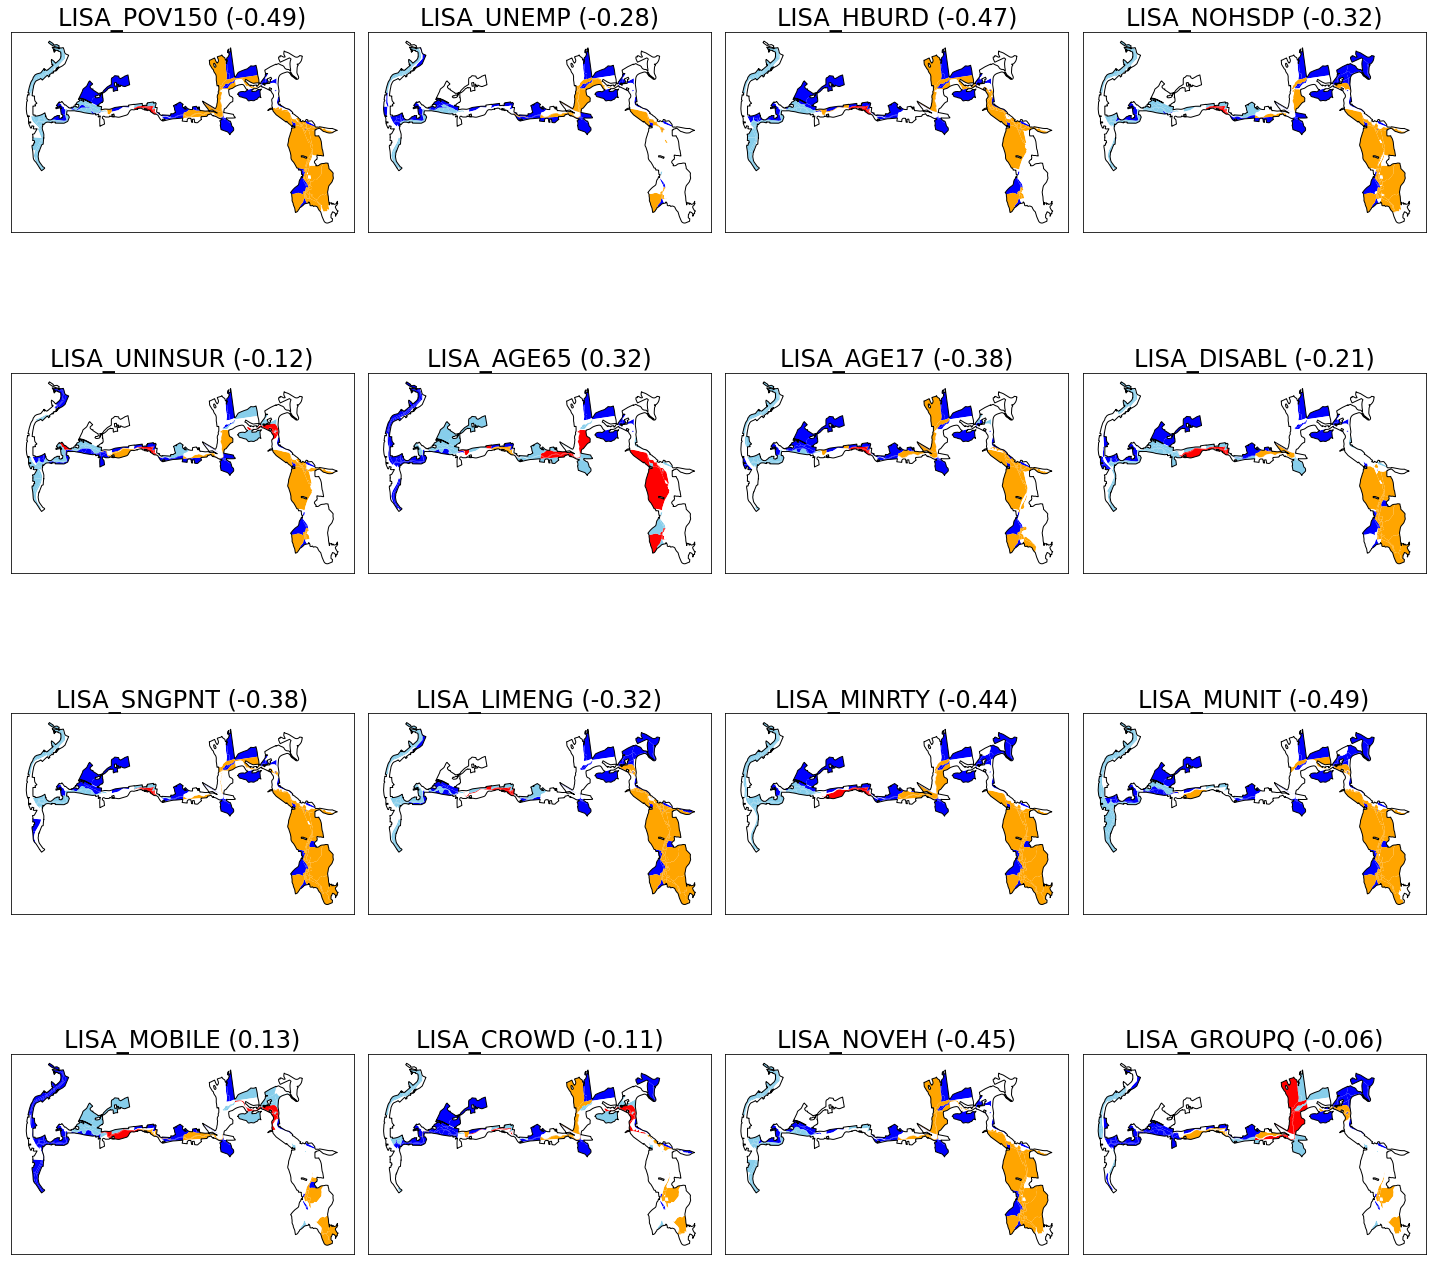

In [43]:
def plot_bivariate_moran_i_and_local_moran_i(dam_id, lm_gdf, mi_gdf):
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))
    ax = axes.reshape(-1)

    # Define geography related to each dam
    dam_area = lm_gdf.loc[lm_gdf['Dam_ID'] == dam_id].reset_index()

    inund_area = dam_area.loc[dam_area['Class'] > 0]
    inund_area_union = inund_area.dissolve(by='Dam_ID')

    dam_focus = mi_gdf.loc[mi_gdf['ID'] == dam_id].reset_index()
    dam_focus = dam_focus.to_crs(epsg=5070)

    # Plot maps
    for m in range(16):
        lisa_color = {'HH': 'red', 'LL': 'blue', 'HL': 'orange', 'LH': 'skyblue', 'Not_Sig': 'white'}

        for key in lisa_color.keys():
            lm_gdf.loc[(lm_gdf[f'{plot_cols_lm[m]}'] == key) & (lm_gdf['Dam_ID'] == dam_id)].plot(ax=ax[m], color=lisa_color[key], legend=True)

        ax[m].set_title(label=f"{plot_cols_lm[m]} ({round(dam_focus[plot_cols_mi[m]].values[0], 2)})", fontsize=24)

        inund_area_union.boundary.plot(ax=ax[m], color='black', lw=1)
        ax[m].get_xaxis().set_visible(False)
        ax[m].get_yaxis().set_visible(False)
        
#     for m in range(17):
#         if m == 0:
#             lm_gdf[lm_gdf['Dam_ID'] == dam_id].plot('Class', cmap='Blues', ax=ax[m])
#             ax[m].set_title(label="Inundated Area", fontsize=24)
#         else:
#             lisa_color = {'HH': 'red', 'LL': 'blue', 'HL': 'orange', 'LH': 'skyblue', 'Not_Sig': 'white'}
            
#             for key in lisa_color.keys():
#                 lm_gdf.loc[(lm_gdf[f'{plot_cols_lm[m-1]}'] == key) & (lm_gdf['Dam_ID'] == dam_id)].plot(ax=ax[m], color=lisa_color[key], legend=True)
            
#             ax[m].set_title(label=f"{plot_cols_lm[m-1]} ({round(dam_focus[plot_cols_mi[m-1]].values[0], 2)})", fontsize=24)

#         inund_area_union.boundary.plot(ax=ax[m], color='black', lw=1)
#         ax[m].get_xaxis().set_visible(False)
#         ax[m].get_yaxis().set_visible(False)
        
    plt.tight_layout()
    plt.show()
    
lm = gpd.read_file(f'./MH_F_Results/{iter_num}/MH_F_lm.geojson')
plot_bivariate_moran_i_and_local_moran_i(dam_id, lm, mi)